# Experiment 2: Exploring Grid Refinement and its Impact on Loss

In this experiment, we investigate how grid refinement impacts the training loss and test loss of a model. We systematically refine the grid at different steps and observe the resulting changes in RMSE.

**Objective**: To evaluate the effect of grid refinement on model performance, as measured by RMSE (Root Mean Square Error).

## Step 1: Import Libraries and Set Up Environment

We start by importing the required libraries and setting up the experiment environment.


In [1]:
from tensorkan.MultKAN import MultKAN as KANTF
import tensorflow as tf
from tensorkan.KANLayer import KANLayer  # 假设 KANLayer 在这个路径下
from tensorkan.utils import create_dataset
import numpy as np

## Step 2: Initialize Dataset and Define Grid Refinement Steps

We use the following settings for the experiment:

- **Initial Grid**: 3
- **Grid Refinement Steps**: [3, 5, 10, 20, 30, 50, 75, 100, 150, 200, 300]
- **Loss Function**: RMSE (Root Mean Square Error)
- **Optimizer**: LBFGS
- **Training Steps per Refinement**: 40

Below is the code for setting up the dataset and defining the grid refinement steps. And two shots to demostrate primary change made by refine.


In [2]:
# initialize KAN with G=3
model = KANTF(width=[2, 1, 1], grid=3, k=3, seed=1, noise_scale=1.0)

# create dataset
f = lambda x: tf.math.exp(tf.math.sin(np.pi * x[:, 0:1]) + tf.math.square(x[:, 1:2]))
dataset = create_dataset(f, n_var=2, train_num=700)
model.fit(dataset, opt="LBFGS", steps=50, lamb=0.001, lr=0.0001);

checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.56e-02 | test_loss: 1.54e-02 | reg: 9.10e+00 |: 100%|█| 20/20 [02:09<00:00,  6.48s/i

Saving model version 0.1


In [3]:
# initialize a more fine-grained KAN with G=10
model = model.refine(10)
model.fit(dataset, opt="LBFGS", steps=50, lamb=0.001, lr=0.0001);

Saving model version 0.2


| train_loss: 9.33e-03 | test_loss: 9.86e-03 | reg: 8.87e+00 |: 100%|█| 20/20 [02:22<00:00,  7.12s/i

Saving model version 0.3


## Step 3: Model Initialization and Grid Refinement

We initialize the model using the `KANTF` class and iteratively refine the grid. After each refinement, we train the model and record the training and testing losses.

- At **step 0**, the model is initialized with a grid size of 3.
- At subsequent steps, the grid is refined to the next size in the list.

The following loop performs the refinement and records losses:


In [9]:
f = lambda x: tf.math.exp(tf.math.sin(np.pi * x[:, 0:1]) + tf.math.square(x[:, 1:2]))
dataset = create_dataset(f, n_var=2, train_num=700)

grids = np.array([3,5,10,20,30,50,75,100,150,200,300])

train_losses = []
test_losses = []
steps = 25
k = 3
for i in range(grids.shape[0]):
    if i == 0:
        model = KANTF(width=[2, 1, 1], grid=3, k=3, seed=1, noise_scale=1.0)
    if i != 0:
        model = model.refine(grids[i])
    results = model.fit(dataset, opt="LBFGS", steps=steps, lr=0.0001)
    train_losses += results['train_loss']
    test_losses += results['test_loss']

checkpoint directory created: ./model
saving model version 0.0



 train_loss: 6.65e-01 | test_loss: 7.01e-01 | reg: 7.22e+00 |: 100%|█| 25/25 [01:59<00:00,  4.78s/i

Saving model version 0.1
Saving model version 0.2



 train_loss: 6.33e-01 | test_loss: 6.66e-01 | reg: 7.43e+00 |: 100%|█| 25/25 [01:53<00:00,  4.56s/i

Saving model version 0.3
Saving model version 0.4



 train_loss: 5.48e-01 | test_loss: 6.30e-01 | reg: 7.41e+00 |: 100%|█| 25/25 [01:58<00:00,  4.74s/i

Saving model version 0.5
Saving model version 0.6



 train_loss: 4.54e-01 | test_loss: 5.51e-01 | reg: 7.42e+00 |: 100%|█| 25/25 [02:08<00:00,  5.13s/i

Saving model version 0.7
Saving model version 0.8



 train_loss: 4.20e-01 | test_loss: 5.20e-01 | reg: 7.40e+00 |: 100%|█| 25/25 [02:17<00:00,  5.52s/i

Saving model version 0.9
Saving model version 0.10



 train_loss: 3.93e-01 | test_loss: 4.94e-01 | reg: 7.36e+00 |: 100%|█| 25/25 [02:21<00:00,  5.66s/i

Saving model version 0.11
Saving model version 0.12



 train_loss: 3.77e-01 | test_loss: 4.77e-01 | reg: 7.40e+00 |: 100%|█| 25/25 [02:25<00:00,  5.82s/i

Saving model version 0.13
Saving model version 0.14



 train_loss: 3.68e-01 | test_loss: 4.68e-01 | reg: 7.37e+00 |: 100%|█| 25/25 [02:44<00:00,  6.57s/i

Saving model version 0.15
Saving model version 0.16



 train_loss: 3.59e-01 | test_loss: 4.67e-01 | reg: 7.40e+00 |: 100%|█| 25/25 [03:15<00:00,  7.83s/i

Saving model version 0.17
Saving model version 0.18



 train_loss: 3.50e-01 | test_loss: 4.73e-01 | reg: 7.40e+00 |: 100%|█| 25/25 [03:10<00:00,  7.62s/i

Saving model version 0.19
Saving model version 0.20


| train_loss: 3.49e-01 | test_loss: 1.15e+02 | reg: 7.43e+00 |: 100%|█| 25/25 [03:42<00:00,  8.91s/i

Saving model version 0.21


## Step 4: Visualize the Results

We plot the training and testing losses for the first 260 steps to observe how grid refinement affects the RMSE. The Y-axis is displayed on a logarithmic scale to better highlight the trend of loss reduction.

The plot below clearly shows the impact of grid refinement:


In [14]:
print(len(train_losses))

275


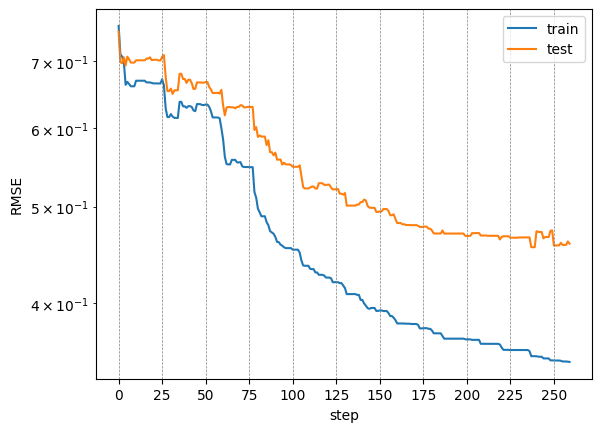

In [17]:
import matplotlib.pyplot as plt

plt.plot(train_losses[:260])
plt.plot(test_losses[:260])
plt.legend(['train', 'test'])
plt.ylabel('RMSE')
plt.xlabel('step')
plt.yscale('log')

for x in range(0, 260, 25):
    plt.axvline(x=x, color='gray', linestyle='--', linewidth=0.5)
plt.xticks(range(0, 260, 25))

plt.show()

## Step 5: Analysis of Results

The following observations were made from the experiment:

1. Rapid Initial Loss Reduction: Each time the grid is refined, the **training loss** and **testing loss** decrease **rapidly** during the early stages of training. This indicates that refining the grid significantly improves the model's ability to approximate the target function at the beginning.

2. Fast Convergence: Despite the rapid initial loss decline, the model tends to **converge quickly** after each refinement. This shows that grid refinement primarily enhances early-stage learning but offers limited long-term improvement.

3. Accuracy-Efficiency Tradeoff:  
   - **Higher Grids Improve Fitting**: Refining the grid to higher resolutions results in lower **RMSE** for both training and testing.  
   - **Diminishing Returns**: As the grid size continues to increase, the improvement in loss becomes **marginal**.  
   - **Generalization Instability**: Extremely high grids may lead to **unstable generalization**, as observed in cases where the test loss fluctuates.  
   - **Increased Computational Cost**: Higher grid refinement significantly increases training time, creating an efficiency bottleneck.


So the Key Insights:

- **KAN's Fitting Potential**:  
  The experiment above demonstrates the strong **function approximation capability** of KAN through grid refinement.  

- **Grid Size Selection**:  
  Refining the grid indiscriminately to higher resolutions is **not optimal**. While accuracy improves, the tradeoff between accuracy and efficiency becomes evident.

- **Balanced Refinement**:  
  A **reasonable grid refinement strategy** must balance accuracy, generalization, and computational cost.

**And Final Recommendation for Readers:**  
To maximize the performance of KAN:  
- Choose grid refinement settings based on the **specific experimental goals** and available **computational resources**.  
- Avoid excessive refinement when generalization stability or efficiency is a concern.